# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [6]:
df=pd.read_csv('Vegetable Price.csv')

In [7]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [9]:
df.isnull().sum()

Weight    0
Price     0
dtype: int64

In [11]:
df[['Weight']].head()

,Weight
0,2
1,4
2,5
3,3
4,6


In [12]:
df.tail()

,Weight,Price
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [13]:
df[['Weight']].tail()

,Weight
2,5
3,3
4,6
5,5
6,7


In [14]:
df.shape

(7, 2)

In [15]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


Text(0, 0.5, 'Price')

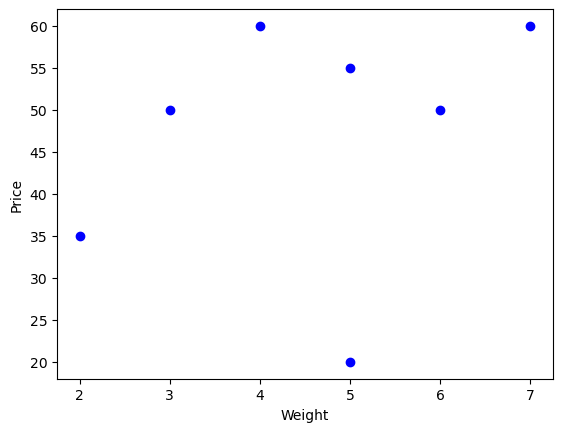

In [19]:
plt.scatter(df.Weight,df.Price,marker='o',color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')

In [20]:
df.Weight.mean()

4.571428571428571

In [21]:
df.Price.mean()

47.142857142857146

In [22]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [25]:
x=df.drop('Price',axis=1)
x.head()

,Weight
0,2
1,4
2,5
3,3
4,6


In [26]:
y=df.drop('Weight',axis=1)
y.head()

,Price
0,35
1,60
2,20
3,50
4,50


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg=LinearRegression()

In [42]:
reg.fit(x,y)

LinearRegression()

# Task 01:
# Your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the price when the vegetable weight is 6.

In [37]:
reg.coef_  #Slope-m

array([[2.62096774]])

In [38]:
reg.intercept_  #y-intercept-C

array([35.16129032])

In [39]:
reg.predict([[6]])   #Predict the price when the vegetable weight is 6.

array([[50.88709677]])

# Task 02:
# Compute the residuals for each data point.

In [43]:
df['Predicted']=reg.predict(x)
df.head()

,Weight,Price,Predicted
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [45]:
df['Residuals']=df[['Price']]-reg.predict(x)
df.head()

,Weight,Price,Predicted,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


Text(0, 0.5, 'Price')

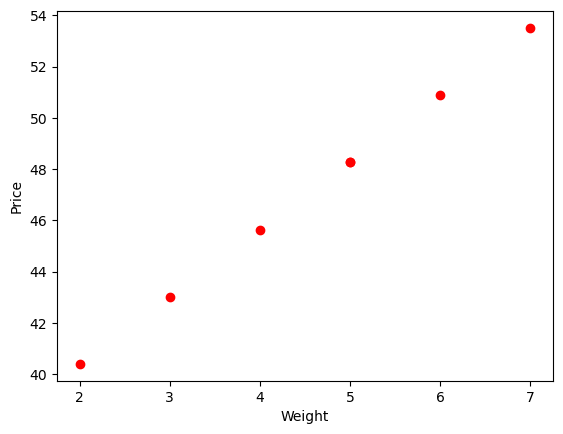

In [51]:
plt.scatter(df.Weight,df.Predicted,color='red')
plt.xlabel('Weight')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

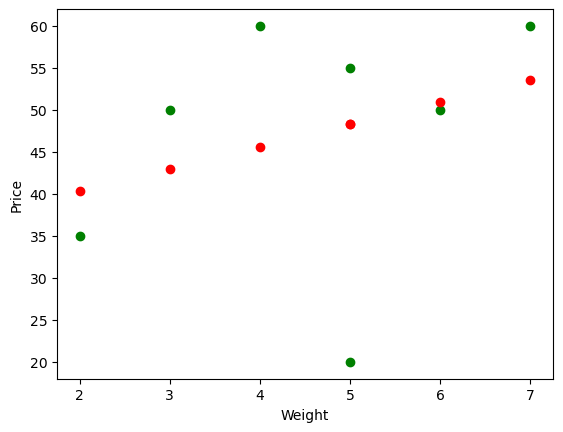

In [52]:
plt.scatter(df.Weight,df.Price,color='green')
plt.scatter(df.Weight,df.Predicted,color='red')
plt.xlabel('Weight')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

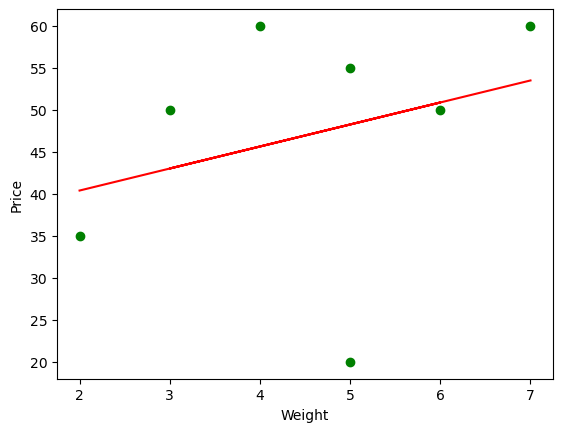

In [54]:
plt.scatter(df.Weight,df.Price,color='green')
plt.plot(df.Weight,df.Predicted,color='red')
plt.xlabel('Weight')
plt.ylabel('Price')

# Task 03:
# Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# MSE

In [56]:
MSE=mean_squared_error(df['Price'],df['Predicted'])

In [57]:
MSE

167.30990783410135

# MAE

In [58]:
MAE=mean_absolute_error(df['Price'],df['Predicted'])

In [59]:
MAE

9.87327188940092